# Разведочный анализ данных. Исследование и визуализация данных.
## 1) Текстовое описание набора данных
В качестве набора данных будем использовать набор данных sklearn.iris

Данные импортируются из библитоеки sklearn

Датасет содержит:
* sepal length(cm) - длинна в см одного лепестка сепал ириса
* sepal width(cm) - ширина в см одного лепестка сепал ириса
* petal length(cm) - длинна в см одного лепестка петал ириса
* petal width(cm) - ширина в см одного лепестка петал ириса
* target - вид ириса
## Импорт библиотек
Импортируем библиотеки с помощью команды import. Как правило, все команды import размещают в первой ячейке ноутбука, но мы в этом примере будем подключать все библиотеки последовательно, по мере их использования.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline 
sns.set(style="ticks")

/tmp/ipykernel_3704/3948341293.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Загрузка данных
Загружаем датасет, после этого с помощью Pandas преобразуем его в более удобный формат

In [8]:
iris=load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

## 2) Основные характеристики датасета

In [9]:
# Первые 5 строк датасета
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [10]:
data.shape

(150, 5)

In [11]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 150


In [12]:
# Список колонок с типами данных
data.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target               float64
dtype: object

In [13]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

sepal length (cm) - 0
sepal width (cm) - 0
petal length (cm) - 0
petal width (cm) - 0
target - 0


In [14]:
# Основные статистические характеристки набора данных
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [30]:
# Определим уникальные значения для целевого признака
data['target'].unique()

array([0., 1., 2.])


## 3) Визуальное исследование датасета

## Диаграмма рассеяния

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

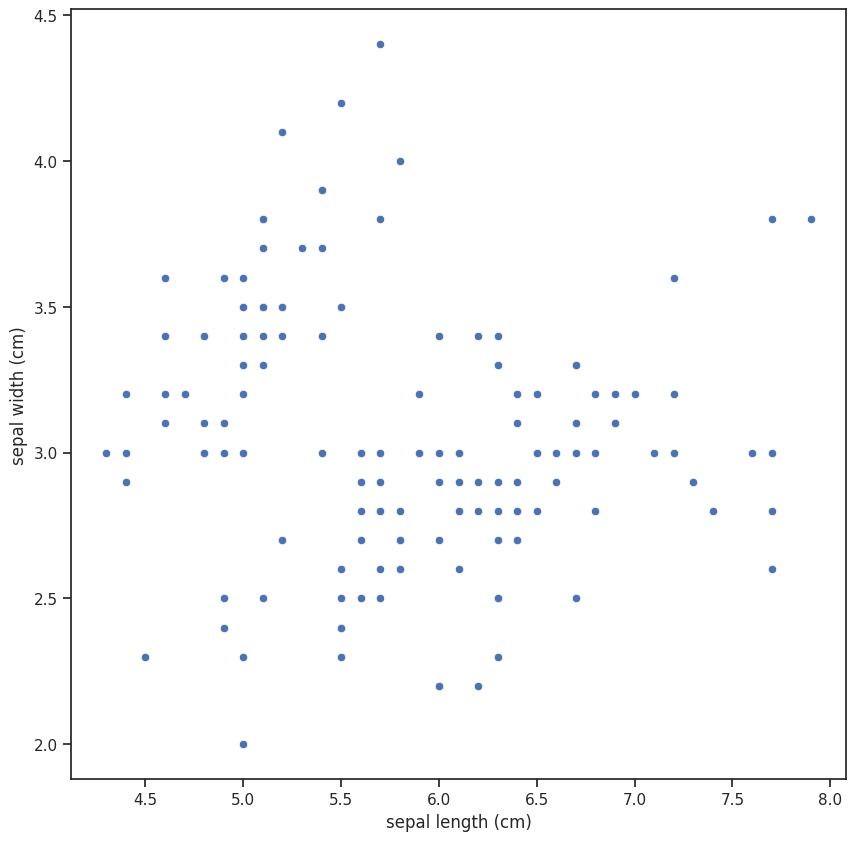

In [17]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='sepal length (cm)', y='sepal width (cm)', data=data)

## "Парные диаграммы"

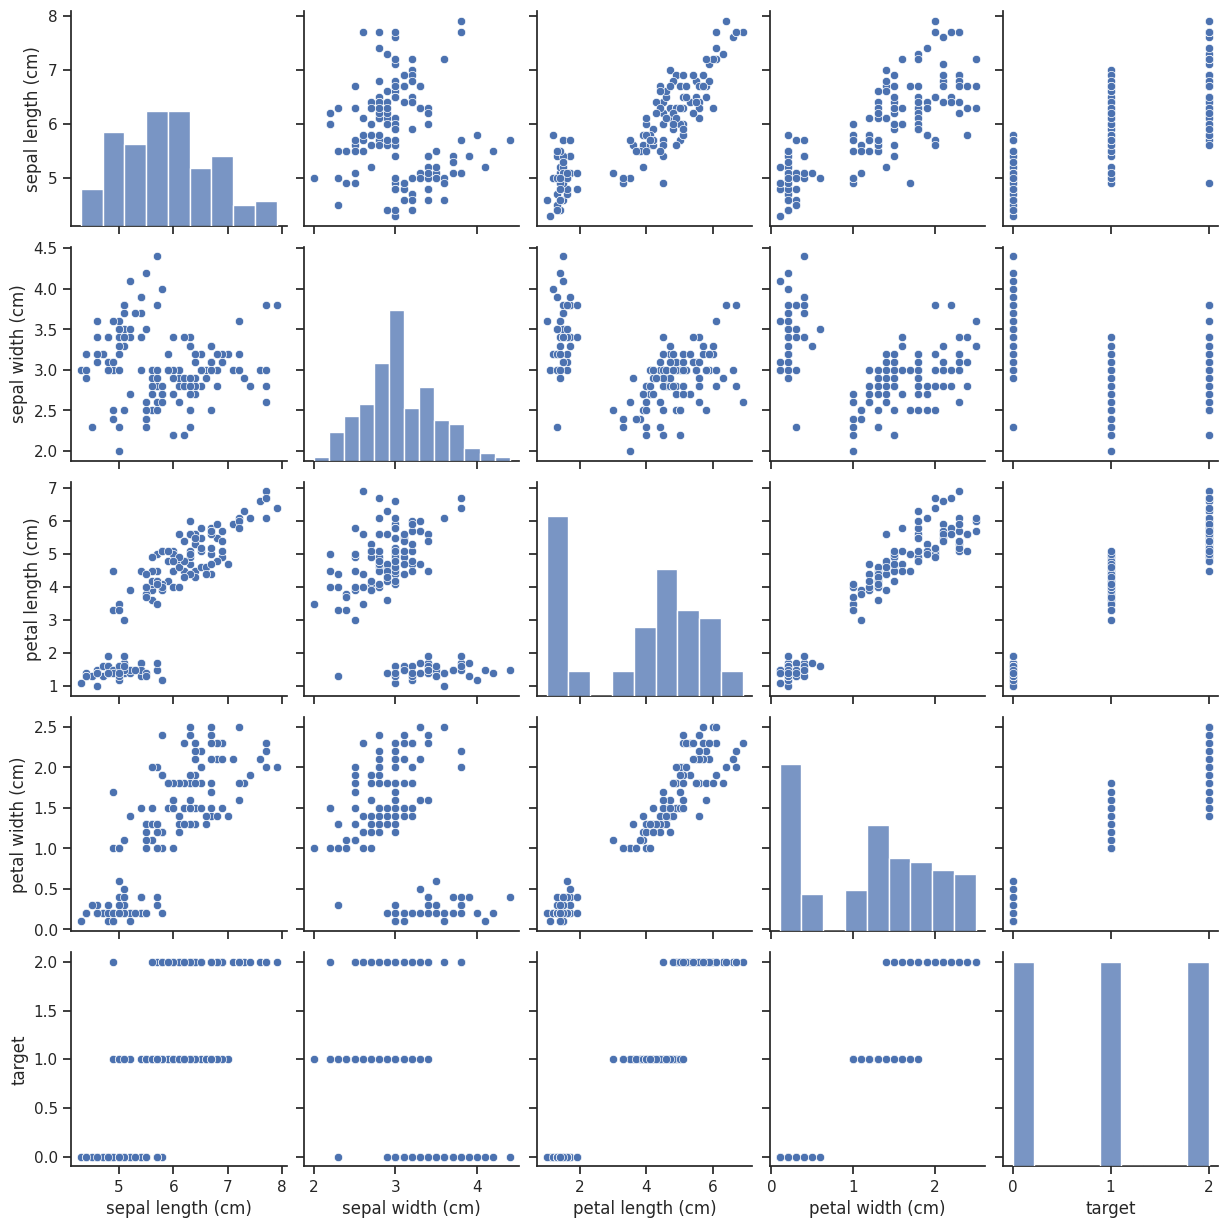

In [18]:
sns.pairplot(data)

## Гистограмма

/tmp/ipykernel_3042/909635561.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['sepal length (cm)'])


<Axes: xlabel='sepal length (cm)', ylabel='Density'>

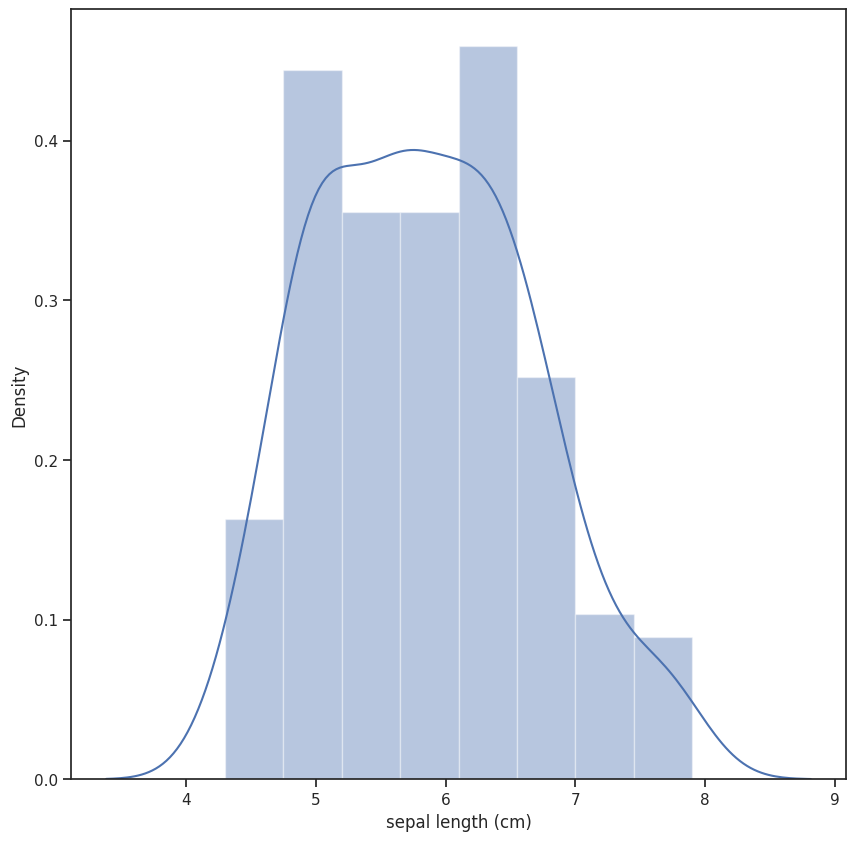

In [20]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['sepal length (cm)'])

# "Парные диаграммы" + доп значение

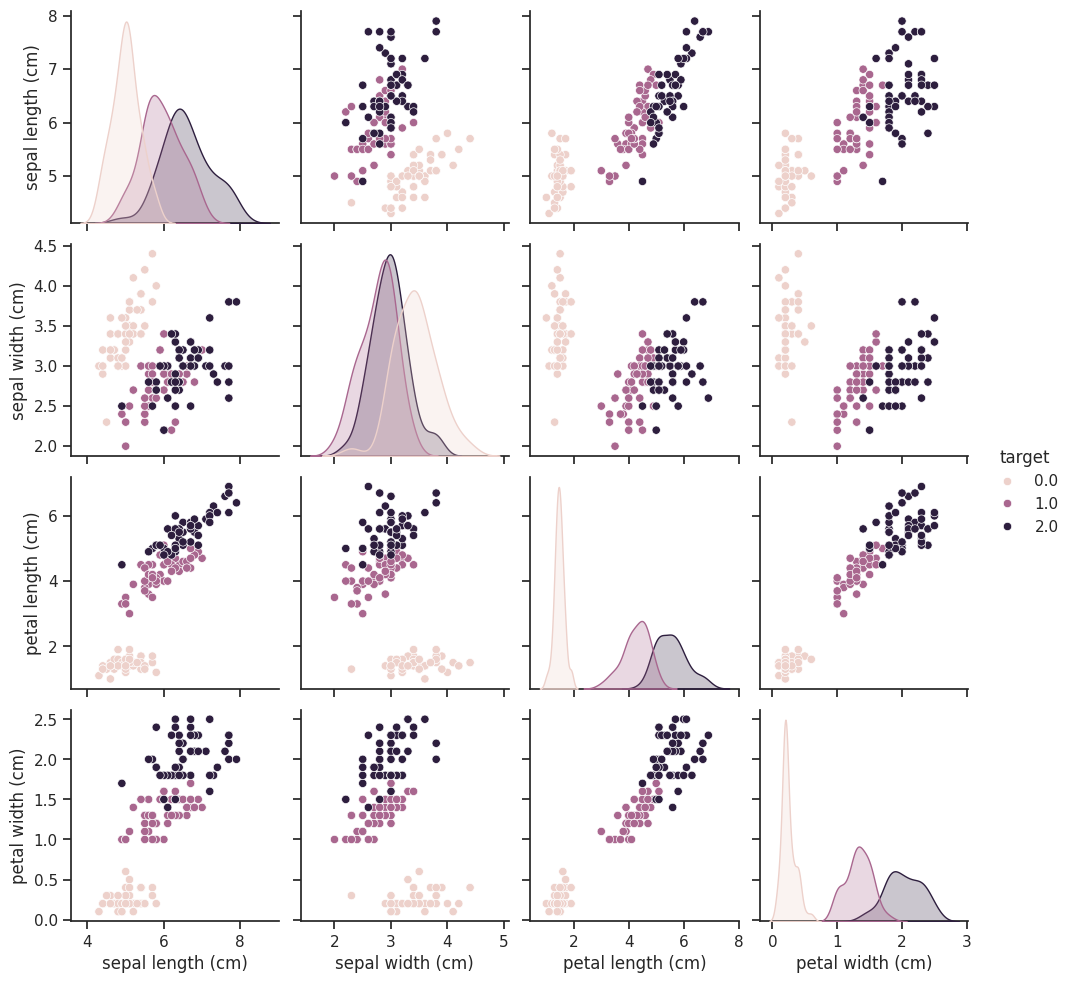

In [21]:
sns.pairplot(data, hue="target")

# Ящик с усами

<Axes: xlabel='sepal length (cm)'>

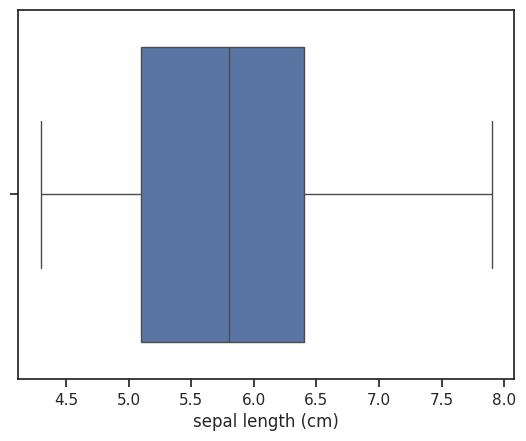

In [22]:
sns.boxplot(x=data['sepal length (cm)'])

## 4) Информация о корреляции признаков

In [19]:
data.corr()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [23]:
data.corr(method='pearson')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [24]:
data.corr(method='spearman')


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.166778,0.881898,0.834289,0.798078
sepal width (cm),-0.166778,1.000000,-0.309635,-0.289032,-0.440290
petal length (cm),0.881898,-0.309635,1.000000,0.937667,0.935431
petal width (cm),0.834289,-0.289032,0.937667,1.000000,0.938179
target,0.798078,-0.440290,0.935431,0.938179,1.000000


<Axes: >

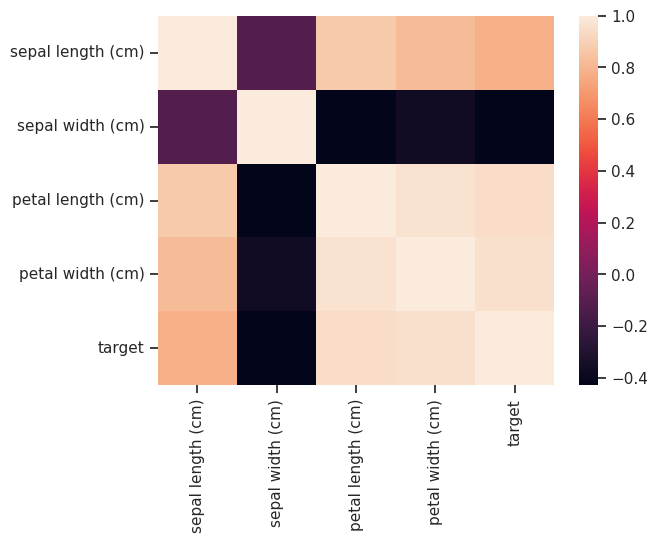

In [25]:
sns.heatmap(data.corr())


<Axes: >

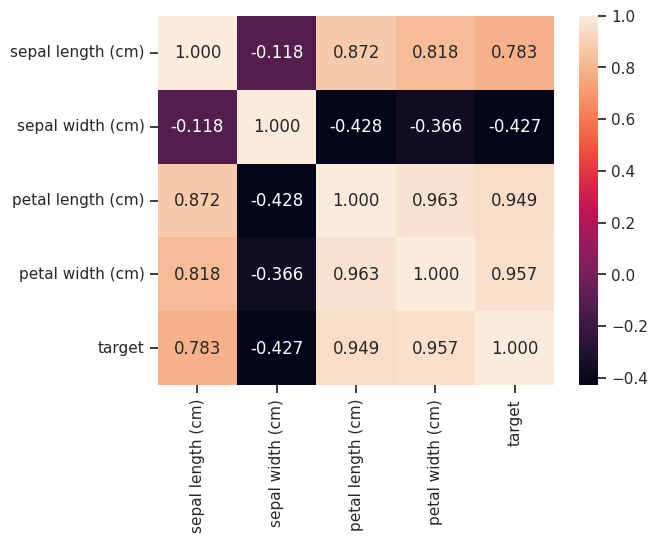

In [26]:
# Вывод значений в ячейках
sns.heatmap(data.corr(), annot=True, fmt='.3f')


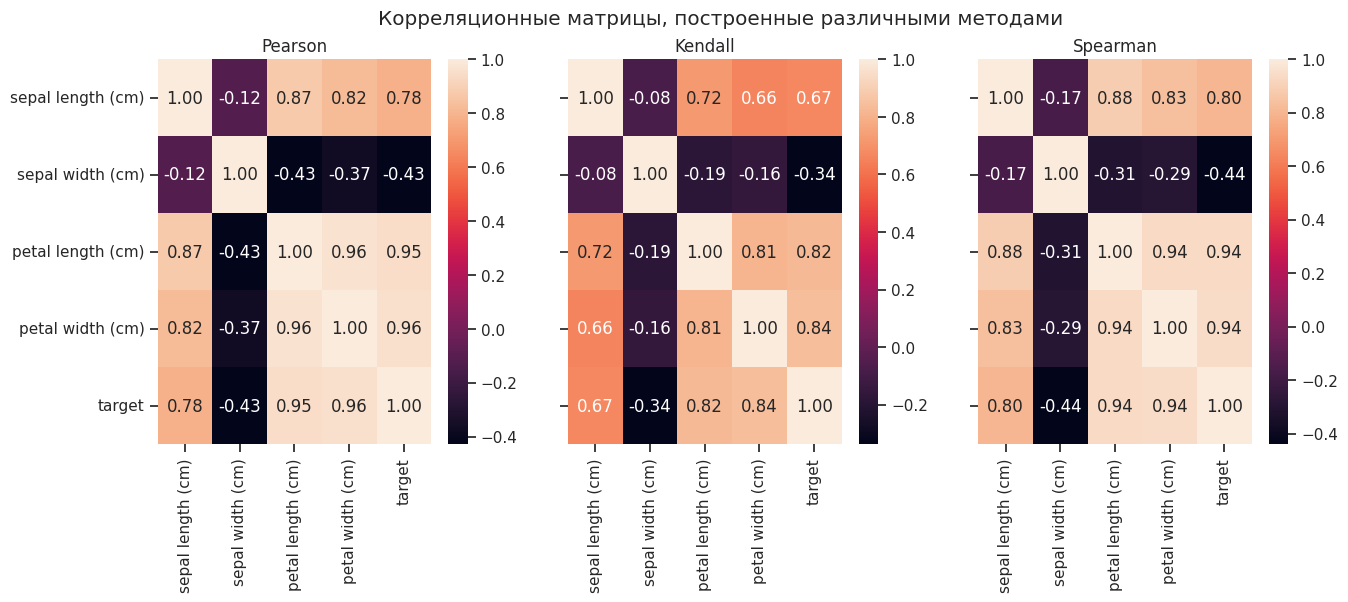

In [28]:


fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')



## Тепловая карта с указание размера

<Axes: >

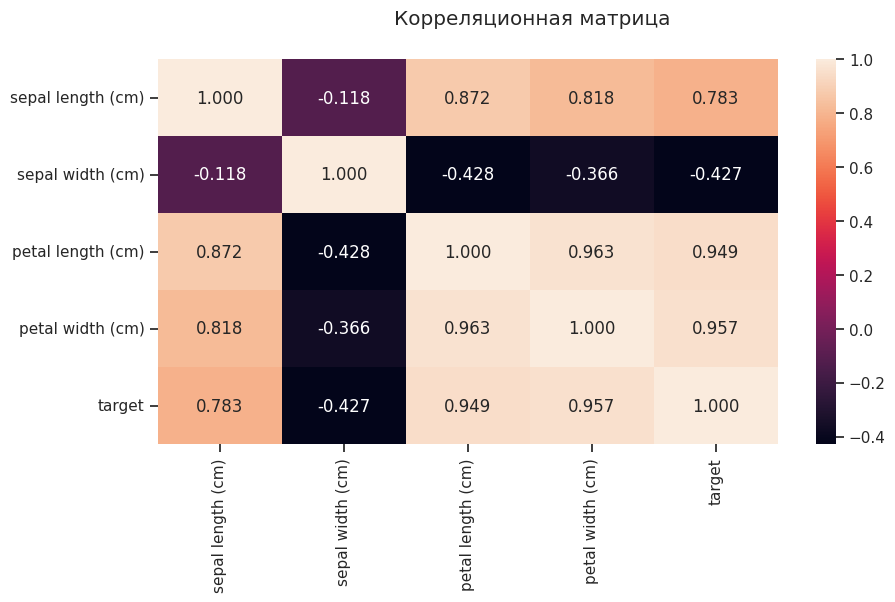

In [29]:
     

fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Корреляционная матрица')
sns.heatmap(data.corr(), ax=ax, annot=True, fmt='.3f')

